# COVID-19: how the World handled

This Jupyter Notebook was created to handle the data exploration, intended to provide insights on the different approaches of countries around the World towards the COVID-19 pandemic.

Data from https://github.com/owid/covid-19-data/tree/master/public/data

Before all, I imported the python libraries used for the analyses. I also set some graphing configurations.

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline 

sns.set_theme()
sns.set_palette('tab10')
plt.rcParams['figure.figsize'] = (10,4)

import warnings
warnings.filterwarnings('ignore')

Now, the data is imported from the file 'owid-covid-data.csv'

In [2]:
data = pd.read_csv('owid-covid-data.csv')
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2/24/2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2/25/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2/26/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2/27/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2/28/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


Looking at the above data, it is possible to notice that the dataset contains many attributes, and some of them contain missing values.
Lets take a closer look.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220343 entries, 0 to 220342
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    220343 non-null  object 
 1   continent                                   207670 non-null  object 
 2   location                                    220343 non-null  object 
 3   date                                        220343 non-null  object 
 4   total_cases                                 211377 non-null  float64
 5   new_cases                                   211112 non-null  float64
 6   new_cases_smoothed                          209916 non-null  float64
 7   total_deaths                                192273 non-null  float64
 8   new_deaths                                  192215 non-null  float64
 9   new_deaths_smoothed                         191035 non-null  float64
 

The above summary reveals that the entire dataset contains 220243 lines of data, displaying 66 attributes. It is possible to notice that several of these attributes are very sparse, containing less than 15% of the lines of data. Many of these features shall not be used in the following analysis, and shall be dropped. 

To clean the dataset, I'll remove some attributes.

In [4]:
data = data.drop(['iso_code','new_cases_smoothed','new_deaths_smoothed',
                  'total_cases_per_million','new_cases_per_million','new_cases_smoothed_per_million',
                  'total_deaths_per_million','new_deaths_per_million','new_deaths_smoothed_per_million',
                  'icu_patients','icu_patients_per_million','hosp_patients','hosp_patients_per_million',
                  'weekly_icu_admissions','weekly_icu_admissions_per_million','weekly_hosp_admissions',
                  'weekly_hosp_admissions_per_million','total_tests_per_thousand','new_tests_per_thousand',
                  'new_tests','new_tests_smoothed_per_thousand','new_vaccinations',
                  'total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred',
                  'total_boosters_per_hundred','new_vaccinations_smoothed_per_million','new_people_vaccinated_smoothed',
                  'new_people_vaccinated_smoothed_per_hundred','excess_mortality_cumulative_absolute',
                  'excess_mortality_cumulative','excess_mortality','excess_mortality_cumulative_per_million'], axis=1)

In order to observe the time evolution of the pandemics, I'll convert the 'date' column into the datetime format.

In [5]:
data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True)

Also, in order to retrieve the data for specific countries, I'll define auxiliary functions: (1) used to get the data the specified country; (2) to smooth the data using a moving average calculated on a period of 7 days.

In [6]:
def retrieveCountry(country):
    dt = data.copy()
    dt = dt[dt['location']==country]
    return dt

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

def avgContinent(continent):
    dt = data.copy()
    dt = dt[dt['continent']==continent].groupby(['date']).mean()
    return dt

Now, it is possible to observe some data regarding the numbers of cases detected and deaths.

Lets start observing South America countries.

Text(0.5, 1.0, 'New cases/day in countries of South America')

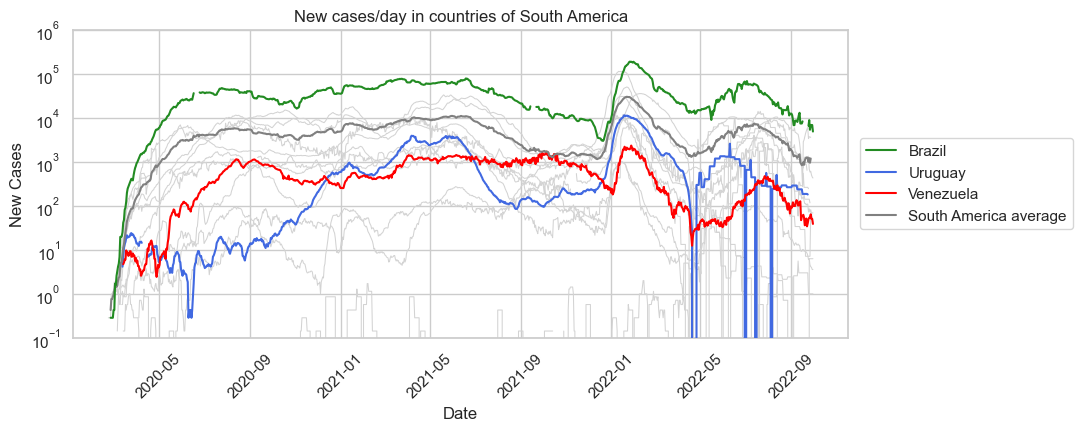

In [7]:
continent = 'South America'
countries = data[data['continent']==continent].location.unique()
sns.set_style("whitegrid")
for country in countries:
    df = retrieveCountry(country)
    if country=='Brazil':
        sns.lineplot(x=df['date'], y=smooth(df['new_cases'],7),
                        linewidth=1.5, color='forestgreen', label=country, zorder=len(countries))
    elif country=='Venezuela':
        sns.lineplot(x=df['date'], y=smooth(df['new_cases'],7),
                        linewidth=1.5, color='red', label=country, zorder=len(countries)-1)
    elif country=='Uruguay':
        sns.lineplot(x=df['date'], y=smooth(df['new_cases'],7),
                        linewidth=1.5, color='royalblue', label=country, zorder=len(countries)-2)
    else:
        sns.lineplot(x=df['date'], y=smooth(df['new_cases'],7),
                        linewidth=0.75, color='lightgray')
avg = avgContinent(continent)
sns.lineplot(x=avg.index, y=smooth(avg['new_cases'],7),
                linewidth=1.5, label=f'{continent} average', color='gray', zorder=len(countries)-1)

plt.xlabel("Date")
plt.ylabel("New Cases")
plt.yscale("log")
plt.ylim(1e-1,1e6)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor = (1.3, 0.5), loc='center right')
plt.title(f'New cases/day in countries of {continent}')

Above it is possible to observe the number of new cases confirmed, smoothed on a 7-days window, for each country of South America.
The data associated to Brazil, highlighted in green, shows that it presented the highest number of confirmed new cases of COVID-19 essentially over the entire time line. The daily numbers are almost 10x higher than the average of the continent, presented in dark gray.

Data associated to the confirmed new cases in Venezuela and Uruguay are also presented for comparison, since these correspond to the lowest and highest GDP (gross domestic product) per capita in the continent. While both countries presented daily cases below the continent average, Uruguay presented a very good control of cases during the first semester of the pandemics, revealing numbers about 1000x lower than the continental average. Later, with the Omicron variant surge (appearing around january/2022), Uruguay's daily cases exceeded the Venezuela's.

Further, it is possible to see that in general, the peak of cases occurring in the continent is associated with the Omicron variant.

Text(0.5, 1.0, 'New deaths/day in countries of South America')

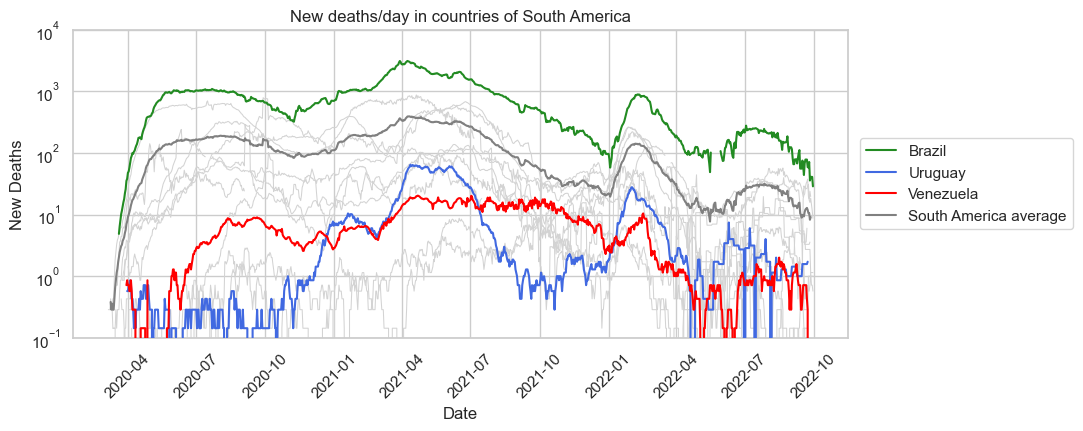

In [8]:
continent = 'South America'
countries = data[data['continent']==continent].location.unique()
sns.set_style("whitegrid")
for country in countries:
    df = retrieveCountry(country)
    if country=='Brazil':
        sns.lineplot(x=df['date'], y=smooth(df['new_deaths'],7),
                        linewidth=1.5, color='forestgreen', label=country, zorder=len(countries))
    elif country=='Venezuela':
        sns.lineplot(x=df['date'], y=smooth(df['new_deaths'],7),
                        linewidth=1.5, color='red', label=country, zorder=len(countries)-1)
    elif country=='Uruguay':
        sns.lineplot(x=df['date'], y=smooth(df['new_deaths'],7),
                        linewidth=1.5, color='royalblue', label=country, zorder=len(countries)-2)
    else:
        sns.lineplot(x=df['date'], y=smooth(df['new_deaths'],7),
                        linewidth=0.75, color='lightgray')
avg = avgContinent(continent)
sns.lineplot(x=avg.index, y=smooth(avg['new_deaths'],7),
                linewidth=1.5, label=f'{continent} average', color='gray', zorder=len(countries)-1)

plt.xlabel("Date")
plt.ylabel("New Deaths")
plt.yscale("log")
plt.ylim(1e-1,1e4)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor = (1.3, 0.5), loc='center right')
plt.title(f'New deaths/day in countries of {continent}')

The graph above shows a behavior directly comparable with the cases/day figure. Brazil presents the higher numbers of confirmed daily deaths caused by COVID-19, about 10x higher than the continental average, however one can notice that the peak associated to the Omicron variant caused less deaths dan the Alpha and Beta variants on average.

Interestingly, at the South America, both Uruguay and Venezuela (countries of highest and lowest GDP per capita in the continent) presented daily number of deaths (associated to COVID-19) consistently and considerably (about 10x lower) lower than the continental average.

Under-reporting is a known problem among countries in the world. In order to estimate the influence of such effect on the continent, let us evaluate the number of tests realized.

Brazil made an average of 103758 tests per day. It corresponds to an average of 0.0005 tests per capita per day.
Uruguay made an average of 8103 tests per day. It corresponds to an average of 0.0024 tests per capita per day.
South America made an average of 24874 tests per day. It corresponds to an average of 0.0007 tests per capita per day.


Text(0.5, 1.0, 'New tests/day in countries of South America')

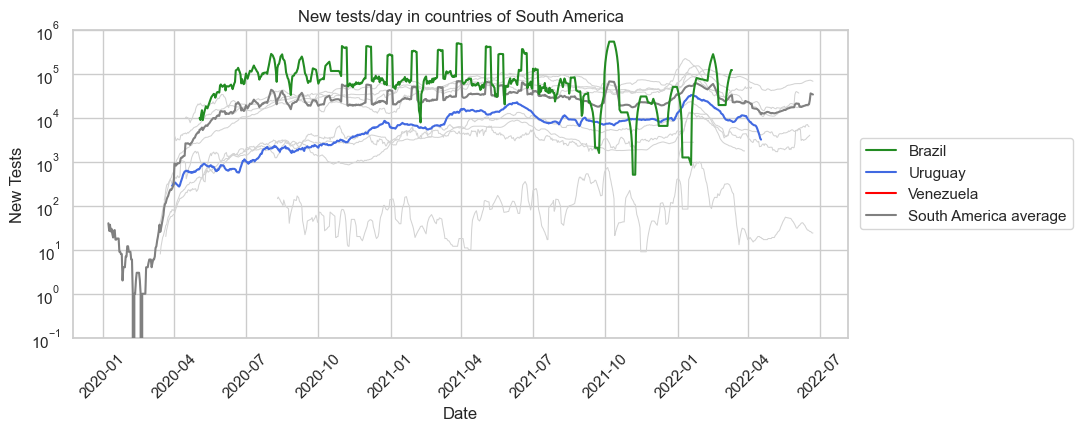

In [9]:
continent = 'South America'
countries = data[data['continent']==continent].location.unique()
sns.set_style("whitegrid")
for country in countries:
    df = retrieveCountry(country)
    if country=='Brazil':
        sns.lineplot(x=df['date'], y=df['new_tests_smoothed'],
                        linewidth=1.5, color='forestgreen', label=country, zorder=len(countries))
        print(f"{country} made an average of {int(df['new_tests_smoothed'].mean())} tests per day. It corresponds to an average of {round(df['new_tests_smoothed'].mean()/df['population'].mean(),4)} tests per capita per day.")
    elif country=='Venezuela':
        sns.lineplot(x=df['date'], y=df['new_tests_smoothed'],
                        linewidth=1.5, color='red', label=country, zorder=len(countries)-1)
    elif country=='Uruguay':
        sns.lineplot(x=df['date'], y=df['new_tests_smoothed'],
                        linewidth=1.5, color='royalblue', label=country, zorder=len(countries)-2)
        print(f"{country} made an average of {int(df['new_tests_smoothed'].mean())} tests per day. It corresponds to an average of {round(df['new_tests_smoothed'].mean()/df['population'].mean(),4)} tests per capita per day.")
    else:
        sns.lineplot(x=df['date'], y=df['new_tests_smoothed'],
                        linewidth=0.75, color='lightgray')
avg = avgContinent(continent)
sns.lineplot(x=avg.index, y=avg['new_tests_smoothed'],
                linewidth=1.5, label=f'{continent} average', color='gray', zorder=len(countries)-1)
print(f"{continent} made an average of {int(avg['new_tests_smoothed'].mean())} tests per day. It corresponds to an average of {round(avg['new_tests_smoothed'].mean()/avg['population'].mean(),4)} tests per capita per day.")

plt.xlabel("Date")
plt.ylabel("New Tests")
plt.yscale("log")
plt.ylim(1e-1,1e6)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor = (1.3, 0.5), loc='center right')
plt.title(f'New tests/day in countries of {continent}')

The results above reveal that Brazil made about 5x more tests (per day) than the average in the continent, however, due to its large population, tested per capita about the same average than the continent. 

Uruguay is a country with a much smaller population than Brazil, what made easier to test. Even realizing around 13x less tests per day, the average number of tests per capita realized on Uruguay was about 5x larger than in Brazil.

R=0.69, p=0.019


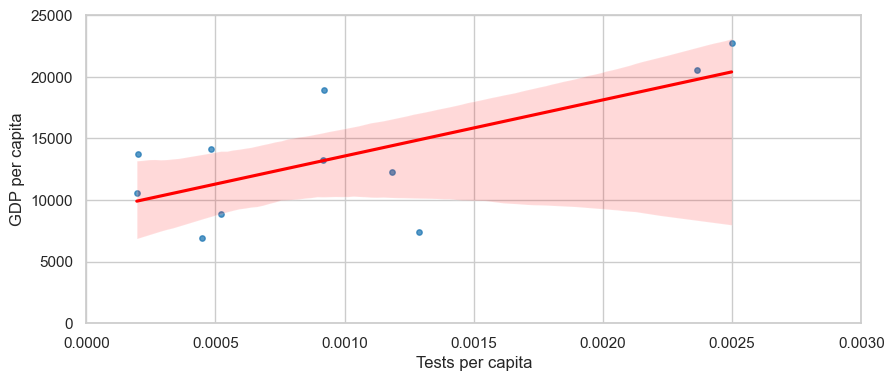

In [10]:
countries_tpc_hdi_sa = []
countries = data[data['continent']=='South America'].location.unique()

def weighted_average(values,weights):
    return sum(values*weights)/weights.sum()

for country in countries:
    df = retrieveCountry(country)
    tests = df.groupby(['new_tests_smoothed'])['new_tests_smoothed'].count()
    countries_tpc_hdi_sa.append([country,weighted_average(np.array(tests.index),np.array(tests))/df['population'].mean(),df['human_development_index'].mean(),df['gdp_per_capita'].mean()])
    
df_sa= pd.DataFrame(data={'Country':np.array(countries_tpc_hdi_sa)[:,0].astype(str),
                             'Tests_per_capita':np.array(countries_tpc_hdi_sa)[:,1].astype(float),
                             'Human_development_index':np.array(countries_tpc_hdi_sa)[:,2].astype(float),
                             'GDP_per_capita':np.array(countries_tpc_hdi_sa)[:,3].astype(float)})

df_sa=df_sa.dropna()
sns.set_style("whitegrid")
sns.regplot(data=df_sa, x='Tests_per_capita', y='GDP_per_capita',
            scatter_kws={'s':15, 'alpha':0.75}, line_kws={'color':'red'})

plt.xlabel("Tests per capita")
plt.ylabel("GDP per capita")
plt.ylim(0,25e3)
plt.xlim(0.0,0.003)
r, p = sp.stats.pearsonr(df_sa['Tests_per_capita'], df_sa['GDP_per_capita'])
print(f"R={r:.2f}, p={p:.2g}")

Above we observe that there is correlation (R ~ 0.7) between the number of tests per capita and the GDP per capita of the countries in South America.

R=0.93, p=3.9e-05


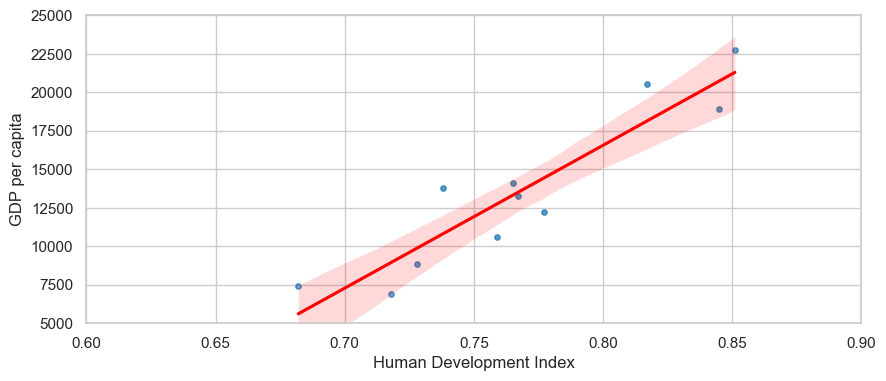

In [11]:
sns.set_style("whitegrid")
sns.regplot(data=df_sa, x='Human_development_index', y='GDP_per_capita',
            scatter_kws={'s':15, 'alpha':0.75}, line_kws={'color':'red'})

plt.xlabel("Human Development Index")
plt.ylabel("GDP per capita")
plt.ylim(5e3,25e3)
plt.xlim(0.6,0.9)
r, p = sp.stats.pearsonr(df_sa['Human_development_index'], df_sa['GDP_per_capita'])
print(f"R={r:.2f}, p={p:.2g}")

And as we can observe above, since the HDI of a country is directly correlated (R ~ 0.9) with it's GDP (in South America), it is possible to infer that the richest countries invested more on testing in the continent.

Lets observe these metrics for the entire world.

In [12]:
countries_tpc_hdi = []
countries = data.location.unique()
for country in countries:
    df = retrieveCountry(country)
    cases = df.groupby(['new_cases'])['new_cases'].count()
    deaths = df.groupby(['new_deaths'])['new_deaths'].count()
    stringency = df.groupby(['stringency_index'])['stringency_index'].count()
    tests = df.groupby(['new_tests_smoothed'])['new_tests_smoothed'].count()
    countries_tpc_hdi.append([country,
                              weighted_average(np.array(tests.index),np.array(tests))/df['population'].mean(),
                              df['human_development_index'].mean(),
                              df['gdp_per_capita'].mean(),
                              weighted_average(np.array(cases.index),np.array(cases))/df['population'].mean(),
                              weighted_average(np.array(deaths.index),np.array(deaths))/df['population'].mean(),
                              weighted_average(np.array(deaths.index),np.array(deaths))/weighted_average(np.array(cases.index),np.array(cases),),
                              weighted_average(np.array(stringency.index),np.array(stringency)),
                              df['people_fully_vaccinated'].max()/df['population'].mean(),
                              df['median_age'].mean(),
                              df['extreme_poverty'].mean(),
                              df['cardiovasc_death_rate'].mean(),
                              df['diabetes_prevalence'].mean(),
                              df['female_smokers'].mean(),
                              df['male_smokers'].mean(),
                              df['hospital_beds_per_thousand'].mean()])
    
df_w= pd.DataFrame(data={'Country':np.array(countries_tpc_hdi)[:,0].astype(str),
                         'Tests_per_capita':np.array(countries_tpc_hdi)[:,1].astype(float),
                         'Human_development_index':np.array(countries_tpc_hdi)[:,2].astype(float),
                         'GDP_per_capita':np.array(countries_tpc_hdi)[:,3].astype(float),
                         'Cases_per_capita':100*np.array(countries_tpc_hdi)[:,4].astype(float),
                         'Deaths_per_capita':100*np.array(countries_tpc_hdi)[:,5].astype(float),
                         'Deaths_per_case':np.array(countries_tpc_hdi)[:,6].astype(float),
                         'Stringency':np.array(countries_tpc_hdi)[:,7].astype(float),
                         'People_vaccinated':100*np.array(countries_tpc_hdi)[:,8].astype(float),
                         'Median_age':np.array(countries_tpc_hdi)[:,9].astype(float),
                         'Extreme_poverty':np.array(countries_tpc_hdi)[:,10].astype(float),
                         'Cardiovascular_death_rate':np.array(countries_tpc_hdi)[:,11].astype(float),
                         'Diabetes_prevalence':np.array(countries_tpc_hdi)[:,12].astype(float),
                         'Female_smokers':np.array(countries_tpc_hdi)[:,13].astype(float),
                         'Male_smokers':np.array(countries_tpc_hdi)[:,14].astype(float),
                         'Hospital_beds':np.array(countries_tpc_hdi)[:,15].astype(float)})

df_w=df_w.dropna()

R=-0.32, p=0.0029


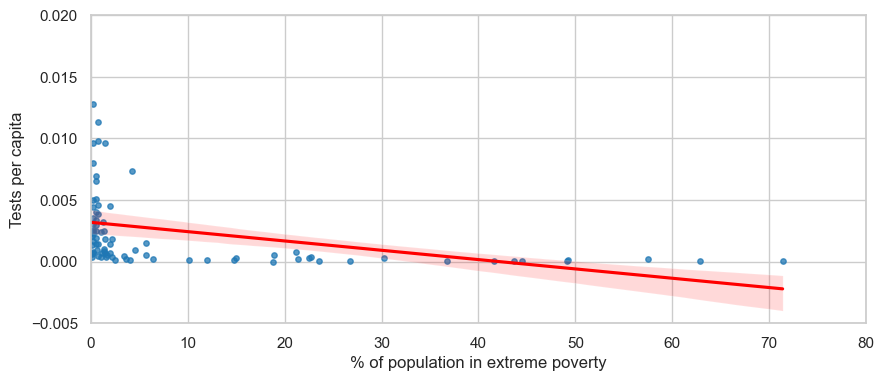

In [13]:
sns.set_style("whitegrid")
sns.regplot(data=df_w, x='Extreme_poverty', y='Tests_per_capita',
            scatter_kws={'s':15, 'alpha':0.75}, line_kws={'color':'red'})

plt.xlabel("% of population in extreme poverty")
plt.ylabel("Tests per capita")
plt.ylim(-5e-3,20e-3)
plt.xlim(0,80)
r, p = sp.stats.pearsonr(df_w['Extreme_poverty'], df_w['Tests_per_capita'])
print(f"R={r:.2f}, p={p:.2g}")

R=0.52, p=3.1e-07


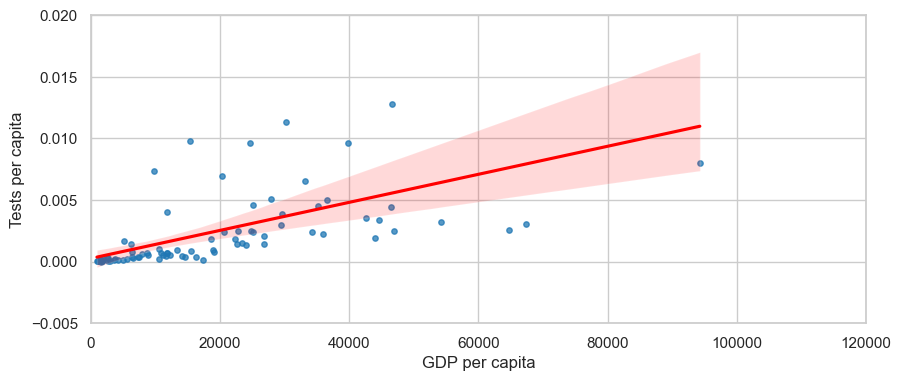

In [17]:
sns.set_style("whitegrid")
sns.regplot(data=df_w, x='GDP_per_capita', y='Tests_per_capita',
            scatter_kws={'s':15, 'alpha':0.75}, line_kws={'color':'red'})

plt.xlabel("GDP per capita")
plt.ylabel("Tests per capita")
plt.xlim(0,12e4)
plt.ylim(-5e-3,20e-3)
r, p = sp.stats.pearsonr(df_w['GDP_per_capita'], df_w['Tests_per_capita'])
print(f"R={r:.2f}, p={p:.2g}")

The graphs above corroborates the thesis that the poorer the country, the less it tests.

R=0.81, p=5.9e-21


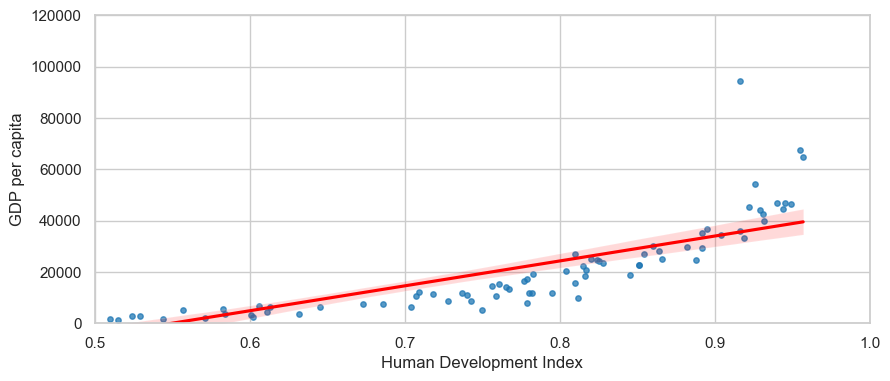

In [18]:
sns.set_style("whitegrid")
sns.regplot(data=df_w, x='Human_development_index', y='GDP_per_capita',
            scatter_kws={'s':15, 'alpha':0.75}, line_kws={'color':'red'})

plt.xlabel("Human Development Index")
plt.ylabel("GDP per capita")
plt.ylim(0,12e4)
plt.xlim(0.5,1)
r, p = sp.stats.pearsonr(df_w['Human_development_index'], df_w['GDP_per_capita'])
print(f"R={r:.2f}, p={p:.2g}")

There is a clear correlation between the HDI and GDP per capita, as expected.

R=0.52, p=3.6e-07


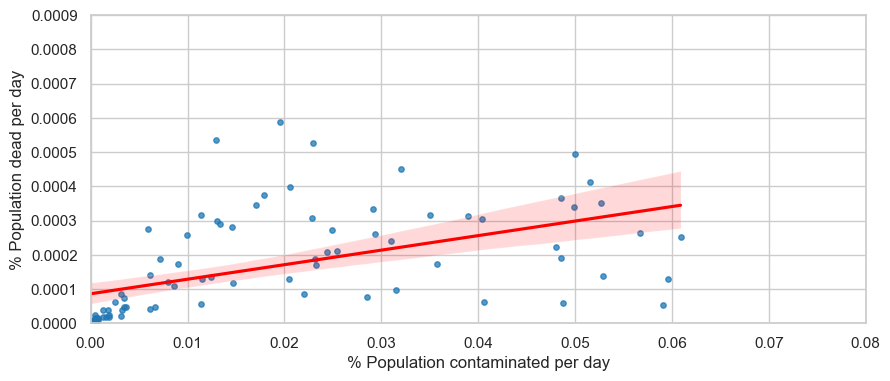

In [19]:
sns.set_style("whitegrid")
sns.regplot(data=df_w, x='Cases_per_capita', y='Deaths_per_capita',
            scatter_kws={'s':15, 'alpha':0.75}, line_kws={'color':'red'})

plt.xlabel("% Population contaminated per day")
plt.ylabel("% Population dead per day")
plt.ylim(0,9e-4)
plt.xlim(0,0.08)
r, p = sp.stats.pearsonr(df_w['Cases_per_capita'], df_w['Deaths_per_capita'])
print(f"R={r:.2f}, p={p:.2g}")

But a moderate correlation linking the number of cases and the number of deaths across the world.

R=0.70, p=1.9e-13


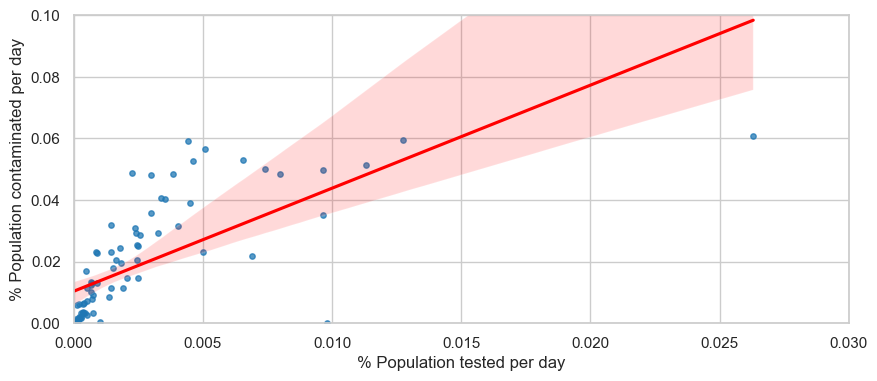

In [29]:
sns.set_style("whitegrid")
sns.regplot(data=df_w, x='Tests_per_capita', y='Cases_per_capita',
            scatter_kws={'s':15, 'alpha':0.75}, line_kws={'color':'red'})

plt.xlabel("% Population tested per day")
plt.ylabel("% Population contaminated per day")
plt.ylim(0,1e-1)
plt.xlim(0,0.03)
r, p = sp.stats.pearsonr(df_w['Tests_per_capita'], df_w['Cases_per_capita'])
print(f"R={r:.2f}, p={p:.2g}")

Another intuitive indication is that, across the world, the more a country tests its population, the higher is it's number of cases.

R=-0.33, p=0.0021


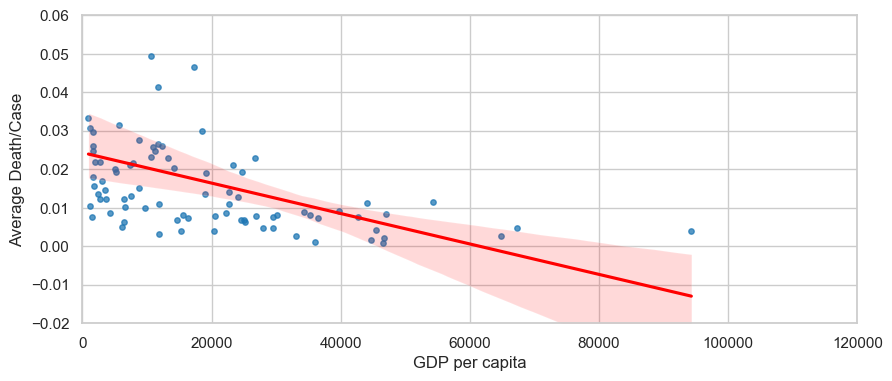

In [21]:
sns.set_style("whitegrid")
sns.regplot(data=df_w, x='GDP_per_capita', y='Deaths_per_case',
            scatter_kws={'s':15, 'alpha':0.75}, line_kws={'color':'red'})

plt.xlabel("GDP per capita")
plt.ylabel("Average Death/Case")
plt.ylim(-2e-2,6e-2)
plt.xlim(0,12e4)
r, p = sp.stats.pearsonr(df_w['GDP_per_capita'], df_w['Deaths_per_case'])
print(f"R={r:.2f}, p={p:.2g}")

Following the previous trend, we can conclude that richer countries test more and present less deaths per case.

R=0.57, p=1.4e-08


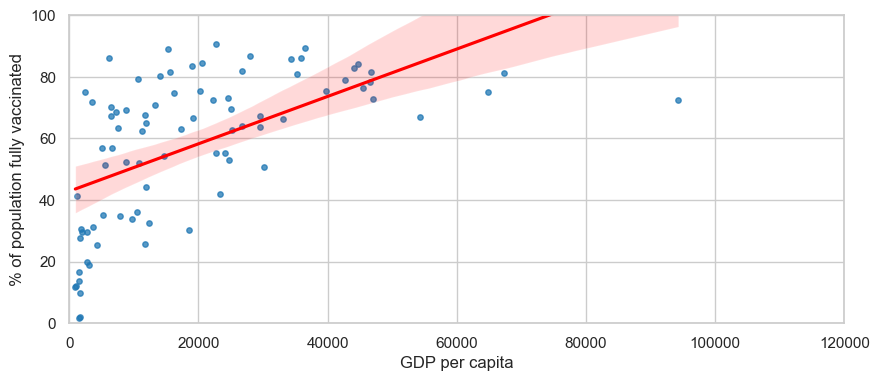

In [22]:
sns.set_style("whitegrid")
sns.regplot(data=df_w, x='GDP_per_capita', y='People_vaccinated',
            scatter_kws={'s':15, 'alpha':0.75}, line_kws={'color':'red'})

plt.xlabel("GDP per capita")
plt.ylabel("% of population fully vaccinated")
plt.ylim(0,100)
plt.xlim(0,12e4)
r, p = sp.stats.pearsonr(df_w['GDP_per_capita'], df_w['People_vaccinated'])
print(f"R={r:.2f}, p={p:.2g}")

Above we can see that the richer countries vaccinated a higher percentage of its population.

R=0.01, p=0.96


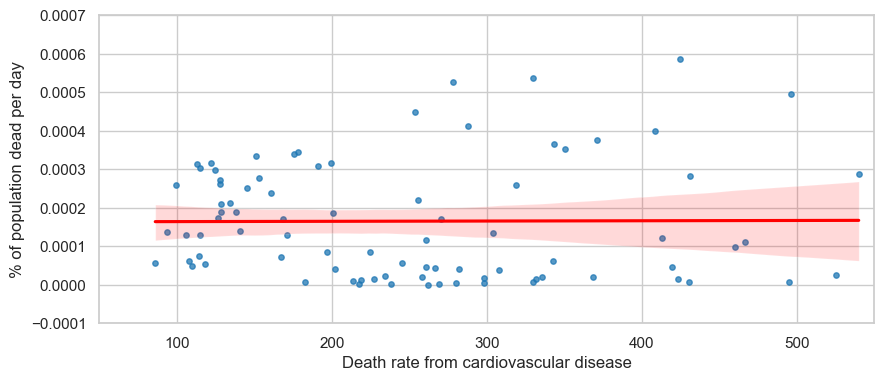

In [23]:
sns.set_style("whitegrid")
sns.regplot(data=df_w, x='Cardiovascular_death_rate', y='Deaths_per_capita',
            scatter_kws={'s':15, 'alpha':0.75}, line_kws={'color':'red'})

plt.xlabel("Death rate from cardiovascular disease")
plt.ylabel("% of population dead per day")
plt.ylim(-1e-4,7e-4)
plt.xlim(50,550)
r, p = sp.stats.pearsonr(df_w['Cardiovascular_death_rate'], df_w['Deaths_per_capita'])
print(f"R={r:.2f}, p={p:.2g}")

R=0.06, p=0.56


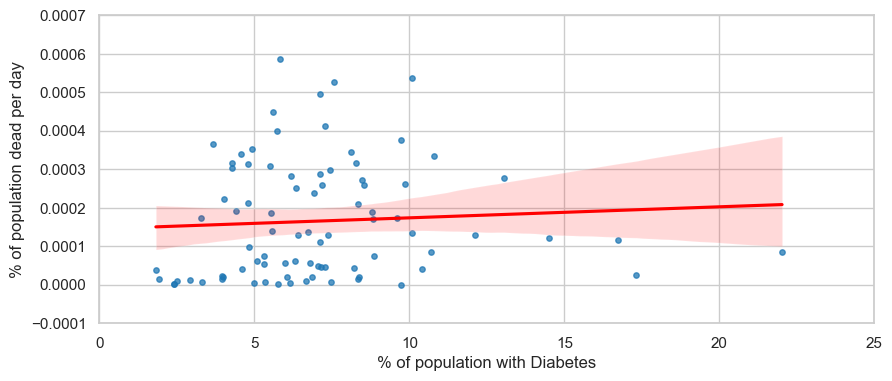

In [24]:
sns.set_style("whitegrid")
sns.regplot(data=df_w, x='Diabetes_prevalence', y='Deaths_per_capita',
            scatter_kws={'s':15, 'alpha':0.75}, line_kws={'color':'red'})

plt.xlabel("% of population with Diabetes")
plt.ylabel("% of population dead per day")
plt.ylim(-1e-4,7e-4)
plt.xlim(0,25)
r, p = sp.stats.pearsonr(df_w['Diabetes_prevalence'], df_w['Deaths_per_capita'])
print(f"R={r:.2f}, p={p:.2g}")

The two graphs above show that conditions such as cardiovascular diseases and diabetes on the country population present no correlation with the number of deaths caused by COVID-19.

R=0.70, p=1.1e-13


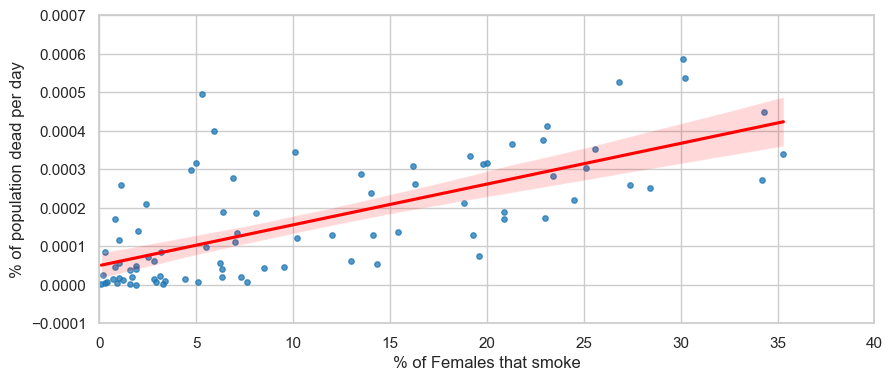

In [25]:
sns.set_style("whitegrid")
sns.regplot(data=df_w, x='Female_smokers', y='Deaths_per_capita',
            scatter_kws={'s':15, 'alpha':0.75}, line_kws={'color':'red'})

plt.xlabel("% of Females that smoke")
plt.ylabel("% of population dead per day")
plt.ylim(-1e-4,7e-4)
plt.xlim(0,40)
r, p = sp.stats.pearsonr(df_w['Female_smokers'], df_w['Deaths_per_capita'])
print(f"R={r:.2f}, p={p:.2g}")

R=0.19, p=0.085


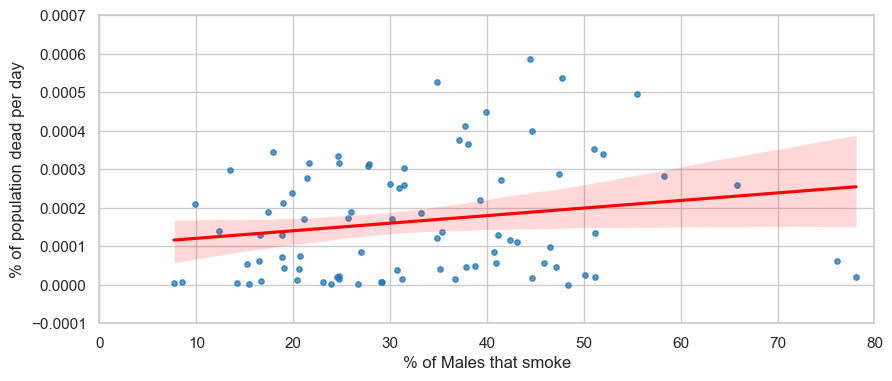

In [26]:
sns.set_style("whitegrid")
sns.regplot(data=df_w, x='Male_smokers', y='Deaths_per_capita',
            scatter_kws={'s':15, 'alpha':0.75}, line_kws={'color':'red'})

plt.xlabel("% of Males that smoke")
plt.ylabel("% of population dead per day")
plt.ylim(-1e-4,7e-4)
plt.xlim(0,80)
r, p = sp.stats.pearsonr(df_w['Male_smokers'], df_w['Deaths_per_capita'])
print(f"R={r:.2f}, p={p:.2g}")

However, the habit of smoking present a clear influence on the number of deaths on a population. In special, when we look for the percentage of women that smoke, which present a strong correlation with the average number of deaths (caused by COVID) per day. Such a conclusion could be expected once it is a disease that is particularly aggressive to the respiratory system.

R=0.70, p=1.6e-13


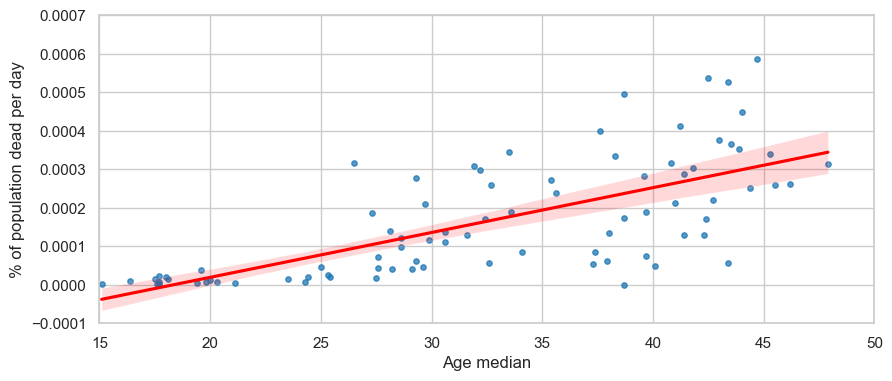

In [27]:
sns.set_style("whitegrid")
sns.regplot(data=df_w, x='Median_age', y='Deaths_per_capita',
            scatter_kws={'s':15, 'alpha':0.75}, line_kws={'color':'red'})

plt.xlabel("Age median")
plt.ylabel("% of population dead per day")
plt.ylim(-1e-4,7e-4)
plt.xlim(15,50)
r, p = sp.stats.pearsonr(df_w['Median_age'], df_w['Deaths_per_capita'])
print(f"R={r:.2f}, p={p:.2g}")

We also see a trend much explored on the news, that the disease attack specially the elders. Above, we can notice that the countries presenting older population also presented a higher average of daily deaths.

R=0.51, p=8.5e-07


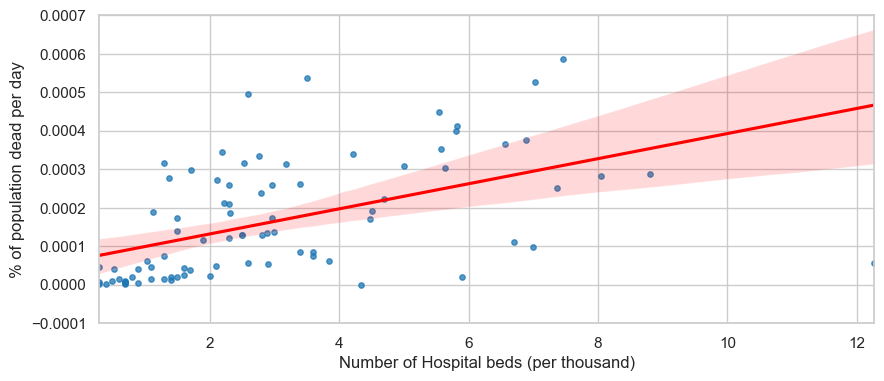

In [28]:
sns.set_style("whitegrid")
sns.regplot(data=df_w, x='Hospital_beds', y='Deaths_per_capita',
            scatter_kws={'s':15, 'alpha':0.75}, line_kws={'color':'red'})

plt.xlabel("Number of Hospital beds (per thousand)")
plt.ylabel("% of population dead per day")
plt.ylim(-1e-4,7e-4)
#plt.xlim(15,50)
r, p = sp.stats.pearsonr(df_w['Hospital_beds'], df_w['Deaths_per_capita'])
print(f"R={r:.2f}, p={p:.2g}")

R=0.40, p=0.00017


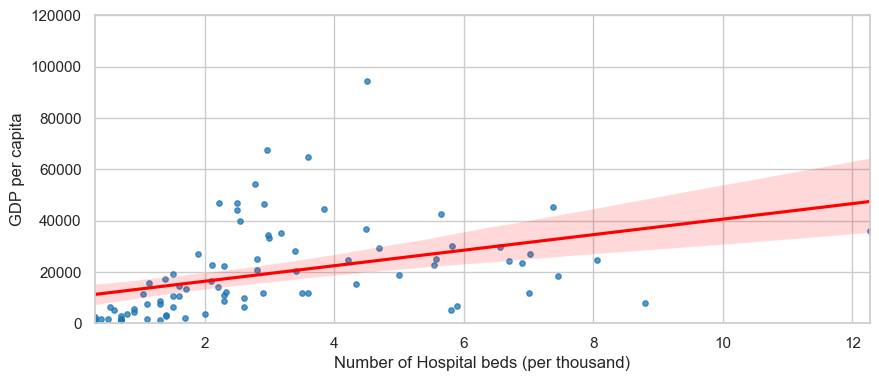

In [34]:
sns.set_style("whitegrid")
sns.regplot(data=df_w, x='Hospital_beds', y='GDP_per_capita',
            scatter_kws={'s':15, 'alpha':0.75}, line_kws={'color':'red'})

plt.xlabel("Number of Hospital beds (per thousand)")
plt.ylabel("GDP per capita")
plt.ylim(0,12e4)
#plt.xlim(15,50)
r, p = sp.stats.pearsonr(df_w['Hospital_beds'], df_w['GDP_per_capita'])
print(f"R={r:.2f}, p={p:.2g}")

The graphs above shows an interesting correlation. Even on richer countries, where there is a higher offer of Hospital beds, there is a higher average of COVID-19 deaths. Such a fact indicate the strength of the disease and its high risk for the people, revealing that the best way to keep alive is avoid contagion.